In [3]:
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("/Users/rahamatulla/Documents/Projects/Customer Segmentation/Online_Retail.xlsx")

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
missing_pct =df.isnull().mean() * 100


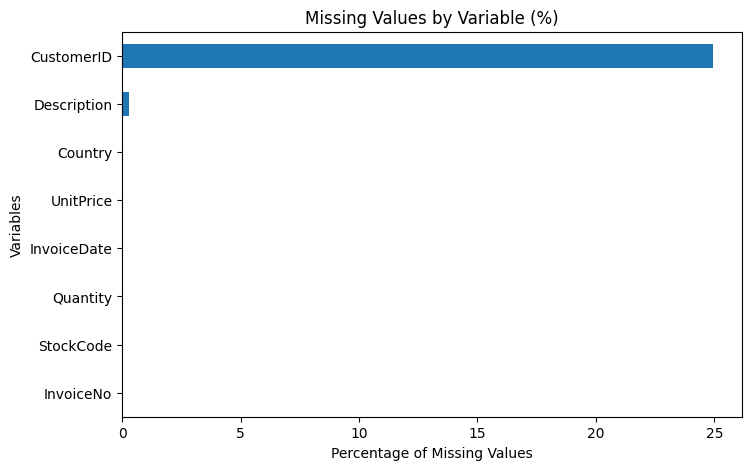

In [7]:
#missing values % in each feature

missing_pct.sort_values().plot(
    kind="barh",
    figsize=(8, 5)
)

plt.xlabel("Percentage of Missing Values")
plt.ylabel("Variables")
plt.title("Missing Values by Variable (%)")
plt.show()


In [8]:
df = df.dropna(subset=["CustomerID"])


In [9]:
df["Description"] = df["Description"].fillna("empty")


/var/folders/zj/kqw3h3fd61j7wwn81qgcrt2m0000gn/T/ipykernel_25839/2327386055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Description"] = df["Description"].fillna("empty")


In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
#Money spent = items bought × price per item
df["Spent"] = df["Quantity"] * df["UnitPrice"]


/var/folders/zj/kqw3h3fd61j7wwn81qgcrt2m0000gn/T/ipykernel_25839/3230776388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spent"] = df["Quantity"] * df["UnitPrice"]


In [12]:
#Group by CustomerID

customer_df = (
    df.groupby("CustomerID")
      .agg(
          total_spent=("Spent", "sum"),
          total_quantity=("Quantity", "sum"),
          total_orders=("InvoiceNo", "nunique")
      )
      .reset_index()
)


In [13]:
#InvoiceDate to Proper DateTime

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


/var/folders/zj/kqw3h3fd61j7wwn81qgcrt2m0000gn/T/ipykernel_25839/1226446839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [14]:
df["Date"] = df["InvoiceDate"].dt.date
df["Time"] = df["InvoiceDate"].dt.time


/var/folders/zj/kqw3h3fd61j7wwn81qgcrt2m0000gn/T/ipykernel_25839/1677345160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["InvoiceDate"].dt.date
/var/folders/zj/kqw3h3fd61j7wwn81qgcrt2m0000gn/T/ipykernel_25839/1677345160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"] = df["InvoiceDate"].dt.time


In [15]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Hour"] = df["InvoiceDate"].dt.hour


/var/folders/zj/kqw3h3fd61j7wwn81qgcrt2m0000gn/T/ipykernel_25839/2616255201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["InvoiceDate"].dt.year
/var/folders/zj/kqw3h3fd61j7wwn81qgcrt2m0000gn/T/ipykernel_25839/2616255201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["InvoiceDate"].dt.month
/var/folders/zj/kqw3h3fd61j7wwn81qgcrt2m0000gn/T/ipykernel_25839/2616255201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [16]:
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()


/var/folders/zj/kqw3h3fd61j7wwn81qgcrt2m0000gn/T/ipykernel_25839/876975995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()


In [17]:
products_df = (
    df[["StockCode", "Description"]]
    .drop_duplicates()
    .reset_index(drop=True)
)


In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Date,Time,Year,Month,Day,Hour,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010,12,1,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,1,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010,12,1,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,1,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,1,8,Wednesday


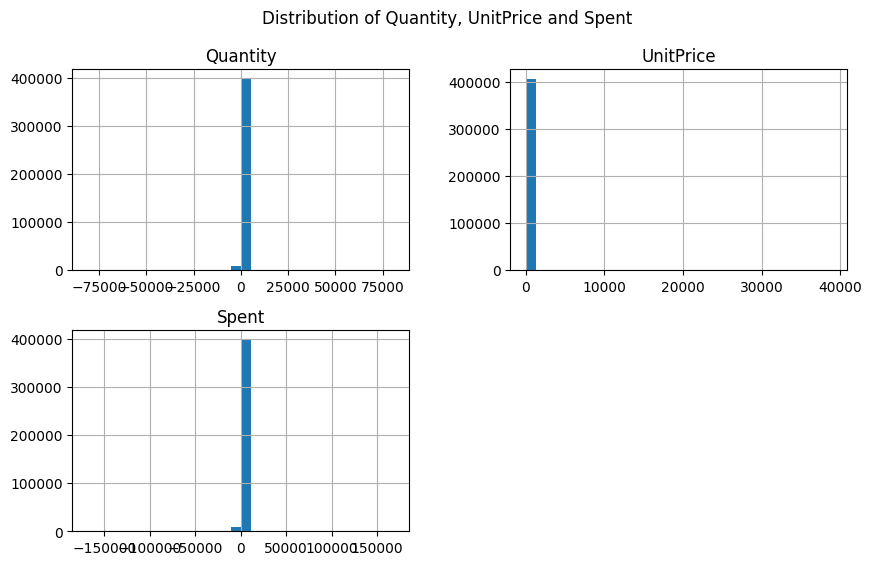

In [19]:
import matplotlib.pyplot as plt

df[["Quantity", "UnitPrice", "Spent"]].hist(bins=30, figsize=(10,6))
plt.suptitle("Distribution of Quantity, UnitPrice and Spent")
plt.show()


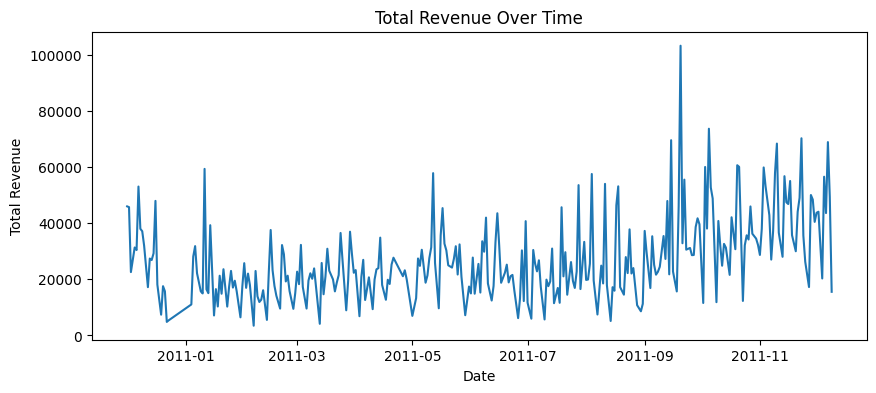

In [21]:
revenue_by_date = df.groupby("Date")["Spent"].sum()

plt.figure(figsize=(10,4))
plt.plot(revenue_by_date)
plt.title("Total Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()


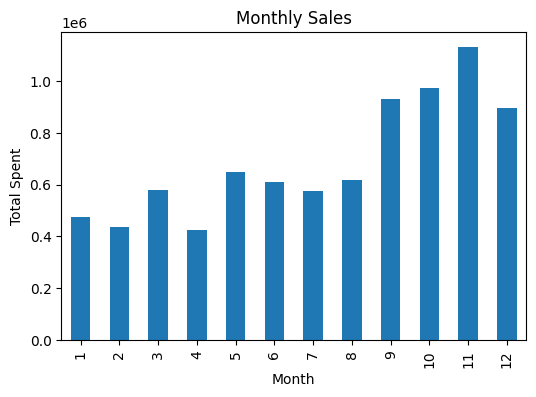

In [22]:
monthly_sales = df.groupby("Month")["Spent"].sum()

plt.figure(figsize=(6,4))
monthly_sales.plot(kind="bar")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.show()


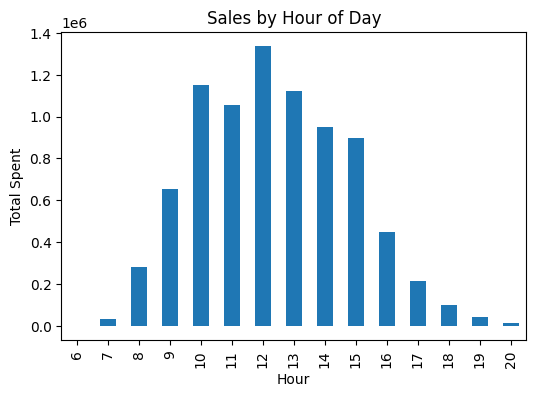

In [23]:
hourly_sales = df.groupby("Hour")["Spent"].sum()

plt.figure(figsize=(6,4))
hourly_sales.plot(kind="bar")
plt.title("Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Spent")
plt.show()


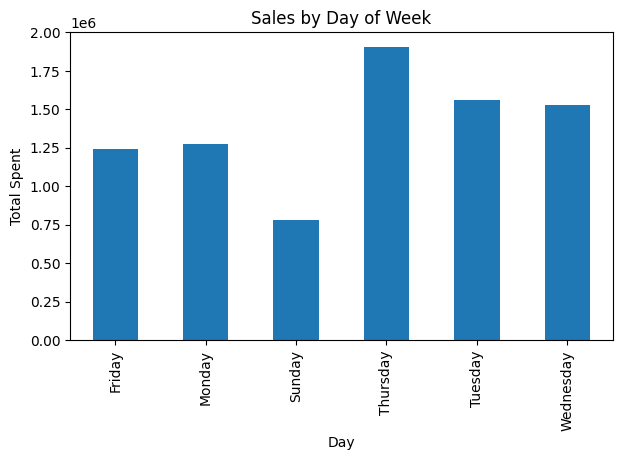

In [24]:
dow_sales = df.groupby("DayOfWeek")["Spent"].sum()

plt.figure(figsize=(7,4))
dow_sales.plot(kind="bar")
plt.title("Sales by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Spent")
plt.show()


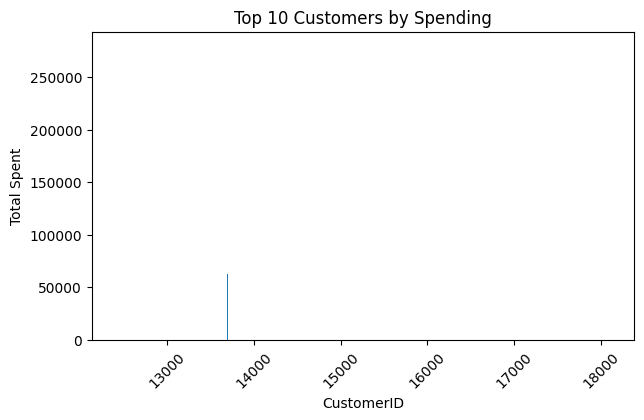

In [25]:
top_customers = (
    customer_df.sort_values("total_spent", ascending=False)
               .head(10)
)

plt.figure(figsize=(7,4))
plt.bar(top_customers["CustomerID"], top_customers["total_spent"])
plt.title("Top 10 Customers by Spending")
plt.xlabel("CustomerID")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()


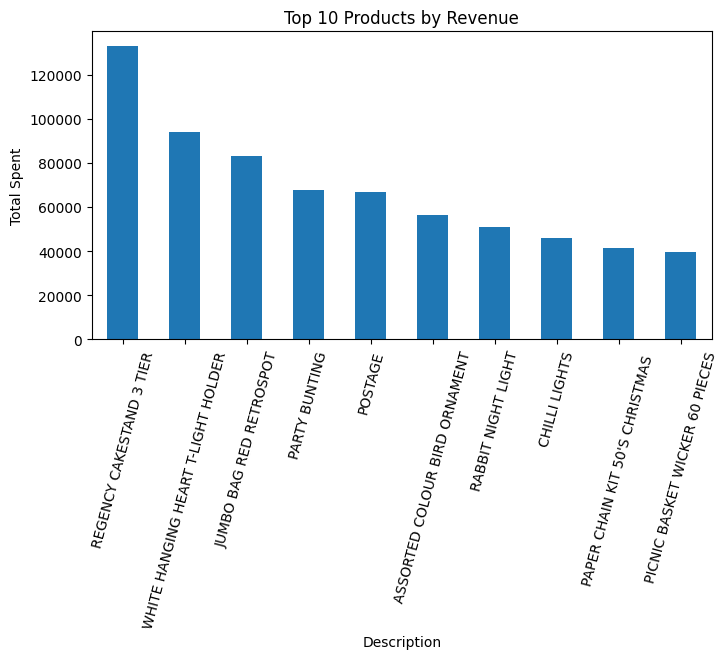

In [26]:
top_products = (
    df.groupby("Description")["Spent"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(8,4))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Spent")
plt.xticks(rotation=75)
plt.show()


In [30]:
import datetime as dt

snapshot_date = df["InvoiceDate"].max() + dt.timedelta(days=1)


In [31]:
rfm = (
    df.groupby("CustomerID")
      .agg(
          Recency=("InvoiceDate", lambda x: (snapshot_date - x.max()).days),
          Frequency=("InvoiceNo", "nunique"),
          Monetary=("Spent", "sum")
      )
      .reset_index()
)

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [32]:
rfm = rfm[rfm["Monetary"] > 0]


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(
    rfm[["Recency", "Frequency", "Monetary"]]
)


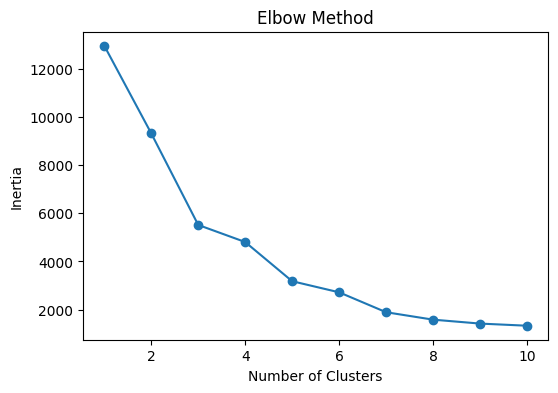

In [34]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)


In [36]:
cluster_summary = (
    rfm.groupby("Cluster")
       .agg(
           Recency=("Recency", "mean"),
           Frequency=("Frequency", "mean"),
           Monetary=("Monetary", "mean"),
           Count=("CustomerID", "count")
       )
)

cluster_summary


,Recency,Frequency,Monetary,Count
Cluster,,,,
0,243.561746,1.869081,488.596872,1077
1,39.750932,5.595031,1807.348271,3220
2,1.333333,213.666667,67328.500000,3
3,6.681818,65.454545,80246.781364,22


In [37]:
rfm["Segment"] = rfm["Cluster"].map({
    0: "Champions",
    1: "Lost Customers",
    2: "Potential Loyalists",
    3: "New Customers"
})


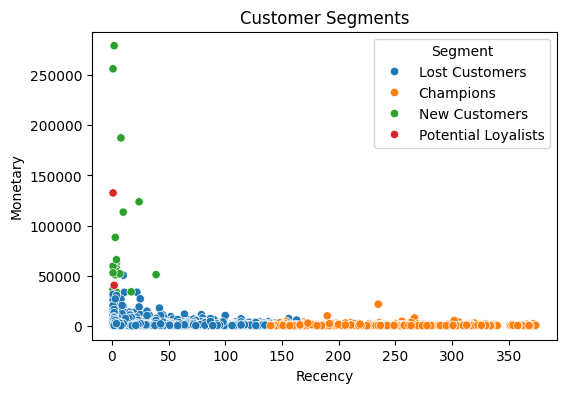

In [38]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=rfm,
    x="Recency",
    y="Monetary",
    hue="Segment"
)
plt.title("Customer Segments")
plt.show()
